# git管理 TODO（現在使ってない）

In [ ]:
!pip install colab-xterm
%load_ext colabxterm

# Flowchart-Detection


In [ ]:
!apt-cache search python3

In [ ]:
!pip freeze

In [3]:
# 関連ライブラリのインストール
!pip install cairosvg
!apt install tree
!pip install xmltodict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (84.7 kB/s)
Selecting previously unselected package tree.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!pwd

/content


In [ ]:
!nvidia-smi

Tue Dec 10 22:43:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   49C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# g-driveのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!ls /content/drive/MyDrive/programs/flow-chart-detection/

ckpt  data  data_yolo  images  output  runs_l  runs_n


In [17]:
# datasetへのpathを設定
PATH_TO_FCDetection = '/content/drive/MyDrive/programs/flow-chart-detection'

In [ ]:
!tree /content/drive/MyDrive/programs/flow-chart-detection

/content/drive/MyDrive/programs/flow-chart-detection
├── ckpt
│   ├── fcos_model_30.pth
│   ├── fcos_model_60.pth
│   ├── fcos_model.pth
│   └── fd_model.pth
├── data
│   ├── flowchart-example001.webp
│   ├── flowchart-example001.xml
│   ├── flowchart-example002.webp
│   ├── flowchart-example002.xml
│   ├── flowchart-example003.png
│   ├── flowchart-example003.xml
│   ├── flowchart-example004.png
│   ├── flowchart-example004.xml
│   ├── flowchart-example006.png
│   ├── flowchart-example006.xml
│   ├── flowchart-example007.png
│   ├── flowchart-example007.xml
│   ├── flowchart-example008.jpeg
│   ├── flowchart-example008.xml
│   ├── flowchart-example009.jpg
│   ├── flowchart-example009.xml
│   ├── flowchart-example012.png
│   ├── flowchart-example012.xml
│   ├── flowchart-example013.png
│   ├── flowchart-example013.xml
│   ├── flowchart-example014.gif
│   ├── flowchart-example014.xml
│   ├── flowchart-example015.png
│   ├── flowchart-example015.xml
│   ├── flowchart-example016.png
│   ├

# 画像の読み込みと中身確認

In [9]:
# ライブラリのインストール
from PIL import Image
import cairosvg
from io import BytesIO
import cv2
from IPython.display import display
import numpy as np
import os
import glob

In [ ]:
#画像の読み込み
files = glob.glob(os.path.join(PATH_TO_FCDetection, 'data', '*'))
print(f"files: {files}")
for path1 in files:
  if path1.rsplit('.', 1)[1] == 'xml':
    continue
  if path1.rsplit('.', 1)[1] == 'svg':
    img = cairosvg.svg2png(url=path1)
    img = Image.open(BytesIO(img))
  else:
    img = Image.open(path1)
  print("type(img), ", type(img))
  print("img.size, ", img.size)
  # img = cv2.imread(path1)
  display(img)

## アノテーションの読み込み

In [ ]:
import xml.etree.ElementTree as ET
for path1 in files:
  if path1.rsplit('.', 1)[1] != 'xml':
    continue
  tree = ET.parse(path1)
  root = tree.getroot()
  for child in root:
    print(child.tag, child.attrib)

folder {}
filename {}
path {}
source {}
size {}
segmented {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
folder {}
filename {}
path {}
source {}
size {}
segmented {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {}
object {

## 画像にアノテーションを描画する

In [ ]:
from PIL import ImageDraw
import xmltodict
# xmlのみ収集
xml_files = []
files = glob.glob(os.path.join(PATH_TO_FCDetection, 'data', '*'))
for path1 in files:
  if path1.rsplit('.', 1)[1] == 'xml':
    xml_files.append(path1)
print('xml_files', xml_files)

# xmlファイルから対応する画像ファイルを読み込む
for xml_path1 in xml_files:
  # get image path... png, jpg, jpeg, ...etc
  # img_path_base = xml_path1.rsplit('.', 1)[0]
  # files = glob.glob(os.path.join(PATH_TO_FCDetection, 'data', img_path_base + '.*'))
  # img_file_name = None
  # for path1 in files:
  #   if path1.rsplit('.', 1)[1] != 'xml':
  #     img_file_name = path1

  with open(xml_path1, 'r') as f:
      xml_string = f.read()
  xml_dict = xmltodict.parse(xml_string)

  colors = {'terminator':"red",
            'process':"green",
            'decision':"#808080",
            'arrow':"#FFA500",
            'text':"blue",
            'start_point':"#800080",
            'data':"grey",
            'connection':"black",
            'end_point':"yellow"}

  anno_dict = xml_dict['annotation']
  # open image
  filename = anno_dict['filename']
  file_path = os.path.join(PATH_TO_FCDetection, 'data', filename)
  print("file_path, ", file_path)
  # if filename.rsplit('.', 1)[1] == 'gif':
  img = Image.open(file_path).convert('RGB')
  # else:
  #   img = Image.open(file_path)
  print("type(img), ", type(img))
  print("img.size, ", img.size)
  # ImageDrawオブジェクトの作成
  draw = ImageDraw.Draw(img)

  for key, value in anno_dict.items():
    if key == 'object':
      for object1 in value:
        print("object1, ", object1)
        xmin = int(object1['bndbox']['xmin'])
        ymin = int(object1['bndbox']['ymin'])
        xmax = int(object1['bndbox']['xmax'])
        ymax = int(object1['bndbox']['ymax'])

        # 矩形の描画
        # (x1, y1)は左上の座標、(x2, y2)は右下の座標
        print("")
        draw.rectangle((xmin, ymin, xmax, ymax), outline=colors[object1['name']],
                       width=3) # fill=colors[object1['name']],

  # 画像の保存
  # img.save('rectangle.png')
  display(img)



# モデルの構築と学習

## importするtorch関係ライブラリ

In [7]:
import xml.etree.ElementTree as ET
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from torchvision.models.detection import fcos_resnet50_fpn
from torchvision.models.detection.fcos import FCOSHead
import cv2
import numpy as np
from PIL import Image
import xmltodict
import albumentations as A
from albumentations.pytorch import ToTensorV2
import os

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


## annotationの前処理

In [17]:
LABELS = {'text':0,
          'arrow':1,
          'connection':2,
          'data':3,
          'decision':4,
          'process':5,
          'terminator':6}

# def preprocess_annotation(root_dir=PATH_TO_FCDetection):
#   xml_files = glob.glob(os.path.join(root_dir, 'data', '*.xml'))
#   print('xml_files', xml_files)
#   annotations = []
#   for xml_path1 in xml_files:
#     with open(xml_path1, 'r') as f:
#         xml_string = f.read()
#     xml_dict = xmltodict.parse(xml_string)
#     anno_dict = xml_dict['annotation']
#     boxes = []
#     labels = []
#     for key, value in anno_dict.items():
#       if key == 'object':
#         for object1 in value:
#           xmin = int(object1['bndbox']['xmin'])
#           ymin = int(object1['bndbox']['ymin'])
#           xmax = int(object1['bndbox']['xmax'])
#           ymax = int(object1['bndbox']['ymax'])
#           boxes.append([xmin, ymin, xmax, ymax])
#           labels.append(LABELs[object1['name']])
#     # img_path = os.path.join(root_dir, 'data', anno_dict['filename'])
#     annotations.append({"image": anno_dict['filename'],
#                         "boxes": boxes,
#                         "labels": labels})
#   return annotations

# annos = preprocess_annotation()
# print(f"len(annos):{len(annos)}")
# print(f"annos[0]['filename']:{annos[0]['image']}")
# print(f"annos[0]['boxes']:{annos[0]['boxes']}")
# print(f"annos[0]['labels']:{annos[0]['labels']}")

def convert_xml_to_yolo(xml_dir, output_dir, image_dir):
    os.makedirs(output_dir, exist_ok=True)
    xml_files = [f for f in os.listdir(xml_dir) if f.endswith('.xml')]

    for xml_file in xml_files:
        # XMLファイルを読み込み
        tree = ET.parse(os.path.join(xml_dir, xml_file))
        root = tree.getroot()

        # 画像情報を取得
        filename = root.find('filename').text
        img_path = os.path.join(image_dir, filename)
        img_width = int(root.find('size/width').text)
        img_height = int(root.find('size/height').text)

        # 出力先ファイル名
        output_txt_path = os.path.join(output_dir, os.path.splitext(filename)[0] + '.txt')

        # バウンディングボックスを変換
        with open(output_txt_path, 'w') as f:
            for obj in root.findall('object'):
                class_name = obj.find('name').text
                if class_name not in LABELS:
                    continue  # 定義されていないクラスはスキップ
                class_id = LABELS[class_name]
                bndbox = obj.find('bndbox')
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)

                # YOLO形式に変換
                x_center = (xmin + xmax) / 2 / img_width
                y_center = (ymin + ymax) / 2 / img_height
                width = (xmax - xmin) / img_width
                height = (ymax - ymin) / img_height

                # 書き込み
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

        print(f"Converted {xml_file} to {output_txt_path}")

# パスの設定
xml_dir = os.path.join(PATH_TO_FCDetection, 'data')  # XMLファイルのディレクトリ
output_dir = os.path.join(PATH_TO_FCDetection, 'data_yolo')  # YOLO形式アノテーションの出力先
image_dir = os.path.join(PATH_TO_FCDetection, 'data')  # 画像が格納されているディレクトリ

# 実行
convert_xml_to_yolo(xml_dir, output_dir, image_dir)

Converted flowchart-example001.xml to /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/flowchart-example001.txt
Converted flowchart-example002.xml to /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/flowchart-example002.txt
Converted flowchart-example003.xml to /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/flowchart-example003.txt
Converted flowchart-example004.xml to /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/flowchart-example004.txt
Converted flowchart-example007.xml to /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/flowchart-example007.txt
Converted flowchart-example008.xml to /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/flowchart-example008.txt
Converted flowchart-example009.xml to /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/flowchart-example009.txt
Converted flowchart-example013.xml to /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/flowchart-example

## yolo datasetに向けた事前準備

In [18]:
# dataディレクトリから画像を data_yolo へコピー
import shutil

img_files = glob.glob(os.path.join(PATH_TO_FCDetection, 'data', '*'))
for path1 in img_files:
  if path1.rsplit('.', 1)[1] == 'xml' or path1.rsplit('.', 1)[1] == 'txt':
    continue
    print(path1)
  shutil.copy(path1, os.path.join(PATH_TO_FCDetection, 'data_yolo/images/train'))

In [20]:
# yoloの学習
from ultralytics import YOLO
model = YOLO(os.path.join(PATH_TO_FCDetection, 'runs_l/train/weights/best.pt'))
model.train(
    data=os.path.join(PATH_TO_FCDetection, 'data_yolo/yolov11_l_241212.yaml'),  # 絶対パス
    epochs=100,
    imgsz=640
)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/programs/flow-chart-detection/runs_l/train/weights/best.pt, data=/content/drive/MyDrive/programs/flow-chart-detection/data_yolo/yolov11_l_241212.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=

100%|██████████| 5.35M/5.35M [00:00<00:00, 98.3MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/labels/train... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<00:00, 170.48it/s]

train: New cache created: /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/labels/val... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 21.44it/s]

val: New cache created: /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.3G      1.627      4.387      1.452        363        640: 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all          5        188    0.00152    0.00222   0.000772   0.000154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100        11G      1.571      4.454      1.414        611        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all          5        188     0.0031     0.0215    0.00179    0.00131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.5G      1.405       3.84      1.303        278        640: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all          5        188      0.645      0.163      0.239      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.5G      1.222       2.42      1.157        336        640: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.66it/s]

                   all          5        188      0.494      0.595      0.459      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100        11G       1.14      1.356      1.059        315        640: 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]


                   all          5        188      0.597      0.678      0.581      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100        11G      1.039     0.9579      1.043        170        640: 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all          5        188      0.739      0.681      0.738       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.4G      1.016     0.8647      1.019        200        640: 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all          5        188      0.834      0.684      0.754      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.4G     0.9933     0.7695     0.9682        255        640: 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all          5        188      0.872      0.716      0.747      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.4G      1.037     0.8284      1.017        183        640: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all          5        188      0.856       0.75      0.744       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.2G     0.9845      0.729     0.9888        266        640: 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all          5        188       0.85      0.731      0.738      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.3G     0.9953     0.7142      0.981        264        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.75it/s]

                   all          5        188      0.855      0.753      0.748       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.3G     0.9572      0.714     0.9799        190        640: 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all          5        188      0.673      0.754       0.75      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.2G     0.9571     0.7355     0.9552        378        640: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]

                   all          5        188      0.726      0.759      0.772      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.6G     0.9429      0.743      1.004        153        640: 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]

                   all          5        188      0.874      0.761      0.768      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.3G     0.9165     0.6678     0.9405        354        640: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all          5        188      0.705      0.836      0.779      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.2G     0.8876     0.6575     0.9641        179        640: 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.41it/s]

                   all          5        188      0.662      0.932      0.787      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100        11G     0.9112      0.609     0.9344        249        640: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.64it/s]

                   all          5        188      0.688      0.838      0.795      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.2G     0.9065     0.6548     0.9586        264        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

                   all          5        188      0.651      0.808      0.775      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.6G     0.9385     0.6238     0.9791        218        640: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.23it/s]

                   all          5        188      0.713      0.869      0.831      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.5G     0.9198     0.6134      0.929        396        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.64it/s]

                   all          5        188      0.714      0.942      0.826      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.3G     0.8958     0.5982     0.9417        387        640: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.13it/s]

                   all          5        188       0.75      0.915      0.801       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.3G     0.8876     0.5672      0.959        233        640: 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.95it/s]

                   all          5        188       0.73      0.902      0.786      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.1G     0.8658     0.5714     0.9489        386        640: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.46it/s]

                   all          5        188      0.744      0.875      0.804      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.3G     0.9283     0.5896     0.9528        284        640: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all          5        188      0.763      0.877      0.817      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.3G     0.8547     0.5607     0.9343        350        640: 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.30it/s]

                   all          5        188      0.791      0.856      0.836      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.5G     0.8772     0.5634     0.9219        284        640: 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.84it/s]

                   all          5        188      0.692      0.766      0.804      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.1G     0.8284     0.5223     0.9405        233        640: 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.94it/s]

                   all          5        188      0.823      0.552      0.673      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.3G     0.9879      0.628          1        190        640: 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.75it/s]

                   all          5        188      0.756      0.285      0.419      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.4G     0.9327     0.5902      0.938        452        640: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.68it/s]

                   all          5        188      0.756      0.285      0.419      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.3G     0.8964     0.5548     0.9307        282        640: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]

                   all          5        188      0.761      0.555      0.599      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.1G     0.8514     0.5402     0.9054        327        640: 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]

                   all          5        188      0.807       0.78      0.854      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.2G     0.8515     0.5518     0.9519        146        640: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]

                   all          5        188       0.71      0.947      0.803      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.2G     0.8737     0.5511     0.9324        265        640: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]

                   all          5        188       0.71      0.947      0.803      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.2G     0.9047     0.5716     0.9333        379        640: 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.19it/s]

                   all          5        188       0.71      0.926      0.821      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.4G     0.8789     0.5559     0.9132        282        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.89it/s]

                   all          5        188       0.75      0.927      0.858       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.6G     0.8981     0.5553      0.927        280        640: 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.51it/s]

                   all          5        188      0.777      0.926      0.847      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.8G     0.8613     0.5509     0.9194        256        640: 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.88it/s]

                   all          5        188      0.777      0.926      0.847      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.5G     0.8688      0.535     0.9135        365        640: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.83it/s]

                   all          5        188      0.767      0.925      0.781      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.3G     0.8609     0.5493     0.9352        233        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]

                   all          5        188      0.726      0.909      0.781      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.2G     0.7942     0.5204     0.9215        206        640: 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]

                   all          5        188      0.789      0.925      0.861      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.3G     0.8696     0.5409     0.9386        322        640: 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.10it/s]

                   all          5        188      0.789      0.925      0.861      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.4G     0.8989     0.5545     0.9521        143        640: 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all          5        188      0.781      0.919      0.905      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100        11G      0.821     0.5268     0.9429        146        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all          5        188      0.795      0.921      0.864      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.1G     0.8051      0.518     0.9078        306        640: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.76it/s]

                   all          5        188      0.718       0.92      0.799      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.5G     0.8778      0.525     0.9255        291        640: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]

                   all          5        188      0.718       0.92      0.799      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.3G     0.8431     0.5371     0.9212        212        640: 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.73it/s]

                   all          5        188      0.748      0.922      0.798      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        11G      0.821     0.5159     0.9228        186        640: 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.84it/s]

                   all          5        188      0.788      0.918      0.799      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.3G     0.8472     0.5303     0.9056        362        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.70it/s]

                   all          5        188      0.768      0.927       0.78      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.4G     0.8212     0.4985     0.9095        186        640: 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.60it/s]

                   all          5        188      0.768      0.927       0.78      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.4G     0.7959     0.5018      0.892        325        640: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]

                   all          5        188      0.808      0.906      0.834      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.3G     0.7928     0.4991      0.901        295        640: 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.83it/s]

                   all          5        188      0.831      0.917      0.847      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.2G     0.7994     0.4742     0.9207        238        640: 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]

                   all          5        188      0.837      0.938      0.863      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.4G     0.7698     0.4705     0.9112        234        640: 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.24it/s]

                   all          5        188      0.837      0.938      0.863      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.5G     0.7695     0.4746     0.9031        175        640: 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.45it/s]

                   all          5        188      0.821      0.936      0.892      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.1G     0.7555     0.4705     0.9003        181        640: 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.22it/s]

                   all          5        188      0.781      0.951      0.876      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.1G     0.8086     0.4941     0.8992        421        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.85it/s]

                   all          5        188        0.8       0.85      0.863      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.4G     0.8044     0.4865     0.9143        247        640: 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.23it/s]

                   all          5        188        0.8       0.85      0.863      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.3G     0.7943     0.4817     0.9212        241        640: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.67it/s]

                   all          5        188      0.764      0.938      0.861        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.2G       0.79     0.4736     0.9131        261        640: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.32it/s]

                   all          5        188      0.807      0.938      0.866      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.3G     0.7937     0.4669     0.9156        302        640: 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all          5        188      0.805      0.933      0.856      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.6G     0.7777     0.5069     0.9329        125        640: 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.04it/s]

                   all          5        188      0.805      0.933      0.856      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.2G     0.7813     0.4592     0.9125        196        640: 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.33it/s]

                   all          5        188       0.83      0.937      0.848      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.7G     0.7942     0.4781     0.9004        391        640: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]

                   all          5        188      0.832      0.941      0.867      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.2G     0.7135      0.437     0.8838        270        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.22it/s]

                   all          5        188       0.84      0.951       0.87        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.4G      0.756     0.4624     0.8984        362        640: 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.80it/s]

                   all          5        188       0.84      0.951       0.87        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.1G     0.7473     0.4591     0.8941        312        640: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.54it/s]

                   all          5        188      0.834      0.941      0.858      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.3G     0.7726     0.4725     0.8994        255        640: 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.29it/s]

                   all          5        188      0.838      0.934      0.875      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.7G     0.7212     0.4468     0.8972        158        640: 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]

                   all          5        188      0.829      0.924      0.868      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.3G     0.7632     0.4501     0.9041        237        640: 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.74it/s]

                   all          5        188      0.829      0.924      0.868      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.4G     0.7852      0.465     0.9128        315        640: 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.91it/s]

                   all          5        188      0.806      0.931      0.856      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.4G     0.7077      0.442     0.8922        184        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all          5        188      0.809      0.943      0.864       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.4G     0.7276     0.4329     0.9154        171        640: 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.04it/s]

                   all          5        188      0.824      0.932      0.869      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.4G     0.7175     0.4462     0.8871        385        640: 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.55it/s]

                   all          5        188      0.824      0.932      0.869      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.4G     0.7171     0.4174     0.8953        258        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]

                   all          5        188      0.841      0.923       0.88      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100        11G     0.7569     0.4416     0.9115        217        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]

                   all          5        188      0.856      0.927      0.887      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.3G     0.7738     0.4691     0.8869        582        640: 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.19it/s]

                   all          5        188      0.848      0.929      0.893      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.5G     0.6881       0.41     0.8817        268        640: 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.37it/s]

                   all          5        188      0.848      0.929      0.893      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.5G     0.7571     0.4483     0.9043        201        640: 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.18it/s]

                   all          5        188       0.85      0.931      0.896      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.3G     0.7365     0.4387     0.9253        163        640: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]

                   all          5        188      0.842      0.933      0.889      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.2G     0.6792     0.4057      0.875        266        640: 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.44it/s]

                   all          5        188      0.841      0.938      0.861      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.3G     0.6876     0.4138     0.8793        269        640: 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.49it/s]

                   all          5        188      0.841      0.938      0.861      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.1G     0.6717     0.3946     0.8681        277        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.23it/s]

                   all          5        188      0.846      0.938       0.86       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.3G     0.7049     0.4088     0.8759        164        640: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.87it/s]

                   all          5        188      0.844      0.938      0.861      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.3G     0.7047     0.4252     0.8756        299        640: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.13it/s]

                   all          5        188      0.803      0.948      0.876      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.3G     0.7346     0.4229     0.9088        220        640: 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.96it/s]

                   all          5        188      0.803      0.948      0.876      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.3G     0.6455     0.3954     0.8738        267        640: 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]

                   all          5        188      0.807      0.939      0.875      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100        11G     0.7137     0.4214     0.8788        293        640: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.48it/s]

                   all          5        188      0.849      0.915      0.888      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.5G     0.7075     0.4117     0.8814        152        640: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.78it/s]

                   all          5        188      0.848      0.916      0.887      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.3G     0.6914     0.4122     0.8727        287        640: 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all          5        188      0.848      0.916      0.887      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.6G     0.6937     0.4202     0.8873        219        640: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]

                   all          5        188      0.849      0.914      0.887      0.721


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.1G     0.6644      0.375     0.8671        149        640: 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.43it/s]

                   all          5        188      0.814       0.93      0.875      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.1G     0.6445     0.3741     0.8504        151        640: 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.54it/s]

                   all          5        188      0.823      0.928      0.875      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.1G     0.6976      0.379     0.9102        177        640: 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.44it/s]

                   all          5        188      0.823      0.928      0.875      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.1G      0.658     0.3738     0.8675        154        640: 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.53it/s]

                   all          5        188      0.842      0.919      0.889      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.1G     0.7118     0.3997     0.8928        121        640: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.21it/s]

                   all          5        188      0.838      0.923      0.889      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.1G     0.7213      0.416     0.9004        164        640: 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.48it/s]

                   all          5        188      0.836      0.925       0.86      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.1G     0.6695     0.3659     0.8624        138        640: 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all          5        188      0.836      0.925       0.86      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.2G     0.6661     0.3853     0.8695        138        640: 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.22it/s]

                   all          5        188      0.836      0.926      0.858      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.1G     0.6742     0.3752     0.8555        185        640: 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.62it/s]

                   all          5        188      0.837      0.927      0.858      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.1G     0.6964     0.3879     0.8665        176        640: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.85it/s]

                   all          5        188      0.837      0.929      0.856        0.7



100 epochs completed in 0.083 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLO11l summary (fused): 464 layers, 25,284,709 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]


                   all          5        188      0.851      0.931      0.896      0.732
                  text          4         56      0.755      0.991      0.859      0.557
                 arrow          5         75          1      0.669      0.804      0.468
                  data          2          2      0.655          1      0.828      0.745
              decision          4          9      0.974          1      0.995      0.924
               process          5         37      0.972      0.926      0.988      0.892
            terminator          4          9      0.749          1      0.904      0.808
Speed: 0.2ms preprocess, 5.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7858a669cb50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [14]:
# 保存モデルの確認
!ls -la /content/drive/MyDrive/programs/flow-chart-detection/
!ls -la runs/detect/train/weights
# !mv yolo11n.pt yolo11_l_2412120234.pt
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/programs/flow-chart-detection/runs_l/train/weights/yolo11_l_24120239.pt

total 28
drwx------ 2 root root 4096 Nov 29 01:18 ckpt
drwx------ 2 root root 4096 Dec 11 16:47 data
drwx------ 4 root root 4096 Dec 11 16:53 data_yolo
drwx------ 2 root root 4096 Dec 11 03:22 images
drwx------ 2 root root 4096 Nov 26 22:51 output
drwx------ 3 root root 4096 Dec 11 04:18 runs_l
drwx------ 2 root root 4096 Dec 11 04:01 runs_n
total 100032
drwxr-xr-x 2 root root     4096 Dec 11 17:24 .
drwxr-xr-x 3 root root     4096 Dec 11 17:28 ..
-rw-r--r-- 1 root root 51209874 Dec 11 17:28 best.pt
-rw-r--r-- 1 root root 51209874 Dec 11 17:28 last.pt


In [14]:
# demo train
from ultralytics import YOLO

# Load a model
# model = YOLO("yolo11n.pt")
model = YOLO("yolo11l.pt")

# Train the model
train_results = model.train(
    data="coco8.yaml",  # path to dataset YAML
    epochs=100,  # number of training epochs
    imgsz=640,  # training image size
    device="cpu",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

# Evaluate model performance on the validation set
metrics = model.val()

# Perform object detection on an image
results = model(os.path.join(PATH_TO_FCDetection, 'images/200730_am01.jpg'))
results[0].show()

# Export the model to ONNX format
path = model.export(format="onnx")  # return path to exported model
# path = model.export(format="pth")  # return path to exported model


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.0M/49.0M [00:00<00:00, 409MB/s]


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=coco8.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

100%|██████████| 433k/433k [00:00<00:00, 94.5MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 4378.92file/s]

Dataset download success ✅ (1.6s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 104MB/s]


KeyboardInterrupt: 


image 1/1 /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/images/val/flowchart-example052.png: 640x416 15 texts, 9 arrows, 3 decisions, 5 processs, 89.6ms
Speed: 4.1ms preprocess, 89.6ms inference, 739.9ms postprocess per image at shape (1, 3, 640, 416)


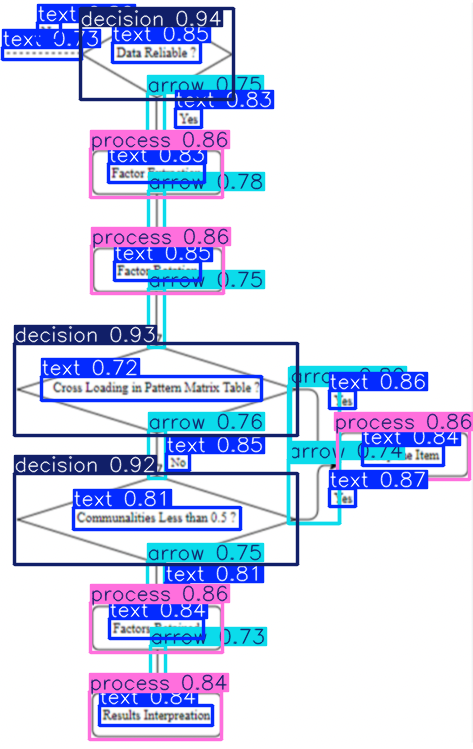


image 1/1 /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/images/val/flowchart-example050.png: 640x480 27 texts, 24 arrows, 4 decisions, 12 processs, 3 terminators, 165.5ms
Speed: 2.1ms preprocess, 165.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


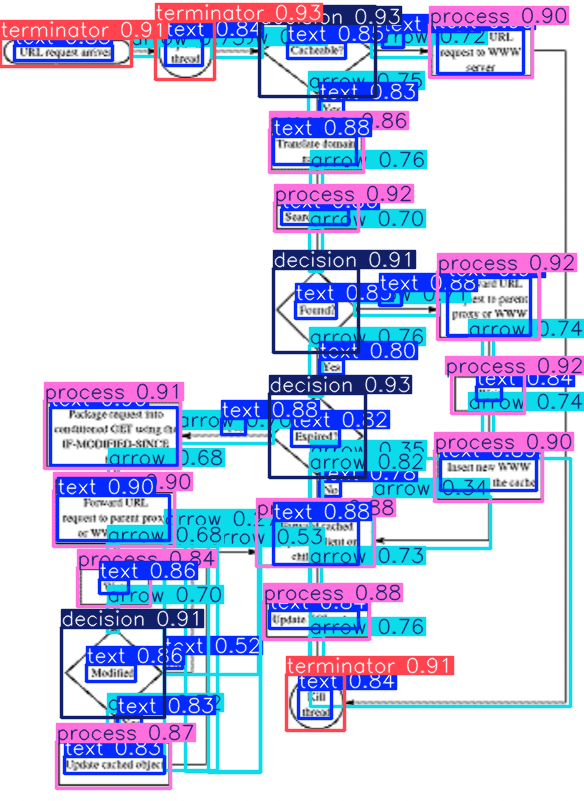


image 1/1 /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/images/val/flowchart-example049.png: 480x640 11 texts, 9 arrows, 3 datas, 5 processs, 5 terminators, 80.4ms
Speed: 2.3ms preprocess, 80.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


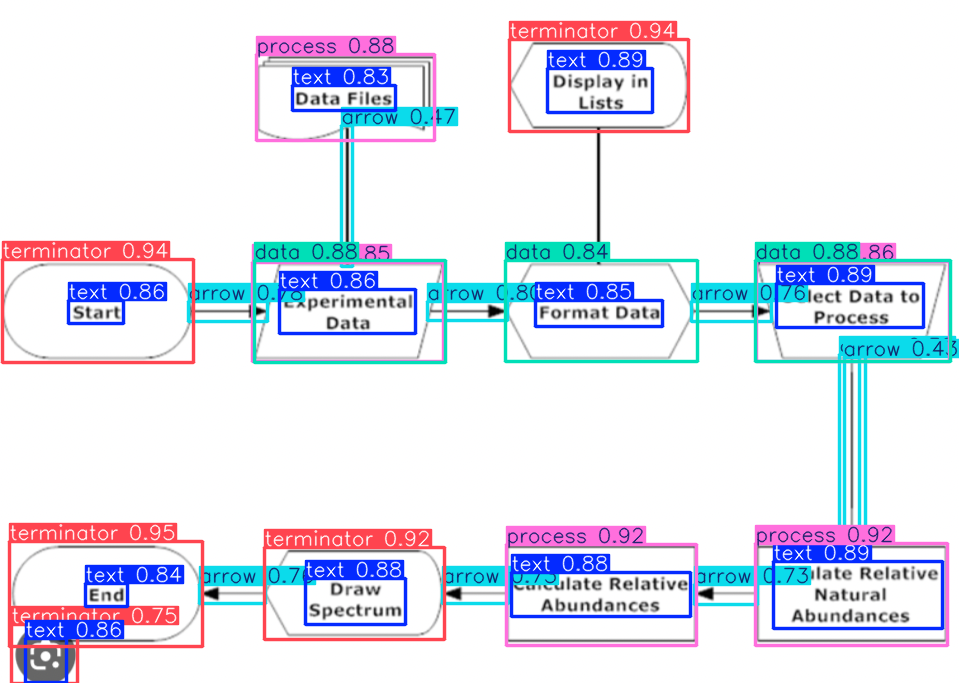


image 1/1 /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/images/val/flowchart-example048.png: 640x544 5 texts, 6 arrows, 1 data, 1 decision, 2 processs, 2 terminators, 79.6ms
Speed: 2.3ms preprocess, 79.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


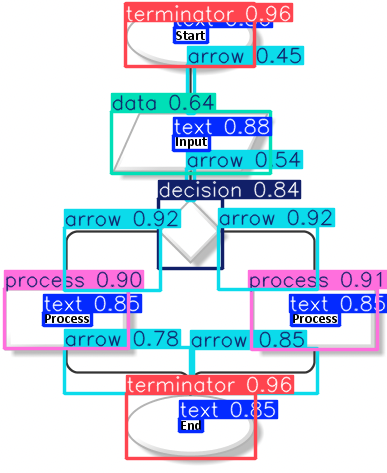


image 1/1 /content/drive/MyDrive/programs/flow-chart-detection/data_yolo/images/val/flowchart-example051.png: 640x576 16 texts, 15 arrows, 1 decision, 11 processs, 2 terminators, 77.3ms
Speed: 2.5ms preprocess, 77.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


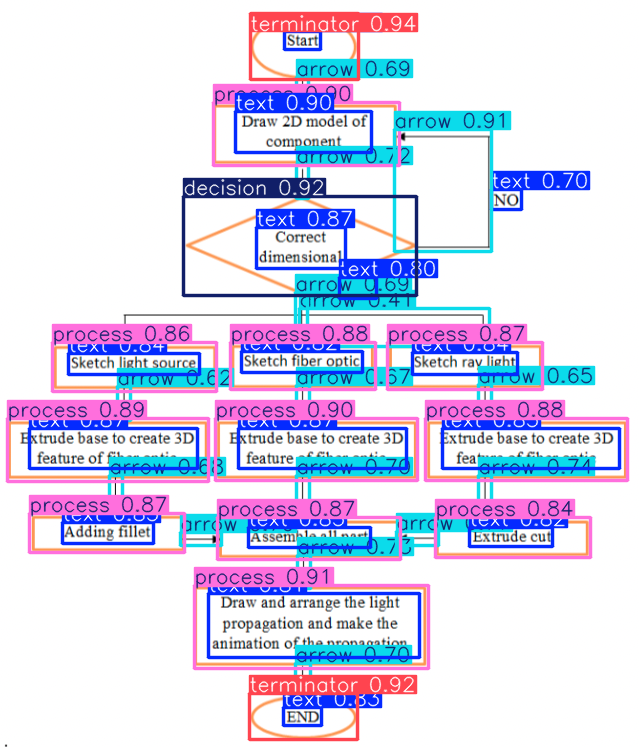

In [19]:
# 保存したぱらめーたによる推論
import os
from ultralytics import YOLO
import glob
# Load a model
# model = YOLO("yolo11n.pt")
model = YOLO(os.path.join(PATH_TO_FCDetection, 'runs_l/train/weights/yolo11_l_24120239.pt'))
# model = YOLO("yolo11l.pt

# Train the model
# train_results = model.train(
#     data="coco8.yaml",  # path to dataset YAML
#     epochs=100,  # number of training epochs
#     imgsz=640,  # training image size
#     device="cpu",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
# )

# Evaluate model performance on the validation set
# metrics = model.val()

# results = model(os.path.join(PATH_TO_FCDetection, 'images/200730_am01.jpg'))
# results = model(os.path.join(PATH_TO_FCDetection, 'images/animals.jpeg'))
img_paths = glob.glob(os.path.join(PATH_TO_FCDetection, 'data_yolo/images/val', '*'))
for img_path in img_paths:
  results = model(img_path)
  results[0].show()
# results = model.predict(os.path.join(PATH_TO_FCDetection, 'data_yolo/images/animals.jpeg'))





In [18]:
# 保存したぱらめーたによる推論
from ultralytics import YOLO

# Load a model
model = YOLO(os.path.join(PATH_TO_FCDetection, 'runs_l/train/weights/best.pt'))

results = model(os.path.join(PATH_TO_FCDetection, 'images/200730_am01.jpg'))
# results[0].show()
print("type(results[0]) ", type(results[0]))
print("len(results) ", len(results))
for box in results[0].boxes:
    print("type(box) ", type(box))
    print("type(box.xyxy) ", type(box.xyxy))
    x1, y1, x2, y2 = box.xyxy[0].tolist()  # バウンディングボックスの座標 (左上と右下)
    confidence = box.conf[0].item()        # 信頼度
    cls = int(box.cls[0].item())          # クラスID
    print(f"Class: {cls}, Confidence: {confidence:.2f}, BBox: [{x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f}]")


image 1/1 /content/drive/MyDrive/programs/flow-chart-detection/images/200730_am01.jpg: 384x640 1 person, 4 cars, 3 trucks, 1 traffic light, 256.7ms
Speed: 2.0ms preprocess, 256.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
type(results[0])  <class 'ultralytics.engine.results.Results'>
len(results)  1
type(box)  <class 'ultralytics.engine.results.Boxes'>
type(box.xyxy)  <class 'torch.Tensor'>
Class: 2, Confidence: 0.87, BBox: [109.33, 720.08, 431.51, 866.19]
type(box)  <class 'ultralytics.engine.results.Boxes'>
type(box.xyxy)  <class 'torch.Tensor'>
Class: 2, Confidence: 0.84, BBox: [753.82, 710.17, 947.63, 867.50]
type(box)  <class 'ultralytics.engine.results.Boxes'>
type(box.xyxy)  <class 'torch.Tensor'>
Class: 7, Confidence: 0.48, BBox: [976.67, 668.87, 1041.76, 728.39]
type(box)  <class 'ultralytics.engine.results.Boxes'>
type(box.xyxy)  <class 'torch.Tensor'>
Class: 2, Confidence: 0.43, BBox: [1144.45, 695.91, 1192.62, 719.60]
type(box)  <class 'ultralytics.